In [25]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

Продакт-менеджер попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [26]:
customers=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-skurlatova-33/CSVs/olist_customers_dataset.csv')
orders= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-skurlatova-33/CSVs/olist_orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
order_details=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-skurlatova-33/CSVs/olist_order_items_dataset.csv',parse_dates=['shipping_limit_date'])

Перед выполнением задач провожу анализ данных в представленных датасетах. Мне интересен тип данных в них, количество уникальных значений.

In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [29]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [30]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [32]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [33]:
#Имеющиеся статусы заказов.Зная их, буду делать вывод о том, что является покупкой
orders.order_status.value_counts() 

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [34]:
order_details.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [35]:
order_details.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [36]:
order_details.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для выполнения этого и последующих заданий необходимо определиться,что считать покупкой. Очивидно, что заказы со статусом "delivered","shipped", "processing" уже оплачены и доставлены или в процессе доставки. Заказы со статусом "cenceled" & "unavailable" покупками считаться не могут ввиду отуствия товара или отмены заказа. Статус "created" тоже не предоставляет информации о факте покупки. К статусу "invoiced" есть вопросы, поэтому проверю его дополнительно

In [37]:
# Объединяю датафреймы с клиентами и заказами
merged_df=orders.merge(customers,how='inner', on='customer_id')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [38]:
merged_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
dtype: int64

Для того, чтобы быть уверенными в том, что заказы со статусом "выставлен счет" оплачены и их тоже можно отнести к покупкам,фильтрую полученный путем объединения датафрейм по статусу заказа, времени заказа и времени его одобрения

In [39]:
invoiced=merged_df.query('order_status=="invoiced" and order_purchase_timestamp<order_approved_at')
invoiced.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28,9a58c55c10b4eb6c69fb0874d8beb466,23025,rio de janeiro,RJ
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06,561cfc00b430b16ff8e8d36429d709e7,32400,ibirite,MG
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20,43f17abb82aa3e528eb5fbacc9b92c77,24445,sao goncalo,RJ


In [40]:
#фильтрую объединенный дф по статусам заказов
purchase=merged_df.query('order_status=="delivered" or order_status=="processing" or order_status=="shipped" or order_status=="invoiced"')

In [41]:
#считаю заказы каждого уникального клиента
order_counts=purchase.groupby('customer_unique_id',as_index=False).agg({'order_id':'count'}).sort_values('order_id')

In [42]:
#выбираю тех, кто сделал один заказ
new=order_counts.query('order_id==1')

In [43]:
new.shape

(92097, 2)

количество покупателей с одним заказом 92097

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Заказ не доставляется, так как не может быть доставлен по причине отмены заказа (canceled) и по причине его недоступности (unavailable)

In [44]:
#создаю колонку с месяцем заказа
merged_df['purchase_month']=merged_df['order_purchase_timestamp'].dt.to_period('M')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [45]:
#создаю дф, отсорированный по нужным статусам заказа, считаю количество заказов
not_delivered=merged_df.query('order_status=="canceled" or order_status=="unavailable"')\
                    .groupby(['purchase_month','order_status']).agg({'order_id':'count'})
not_delivered.head()

order_id
purchase_month order_status          
2016-09        canceled             2
2016-10        canceled            24
               unavailable          7
2017-01        canceled             3
               unavailable         10

In [46]:
#определяю среднее количество недоставленных в месяц заказов с указанием причин
mean=not_delivered.groupby('order_status').agg({'order_id':'mean'}).rename(columns={'order_id':'mean_quantity'})
mean

,mean_quantity
order_status,
canceled,26.041667
unavailable,29.000000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается


За покупку принимаю заказы со статусом 'invoiced','delivered','shipped','processing'. Для этого используею отсортированный датафрейм из шага 1.

In [83]:
#объединяю в один дф отсортированный дф из 1 задания и дф с деталями заказа
all_in_one=order_details.merge(purchase,on='order_id',how='left')

In [84]:
all_in_one.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                       552
order_status                      552
order_purchase_timestamp          552
order_approved_at                 567
order_delivered_carrier_date     1270
order_delivered_customer_date    2461
order_estimated_delivery_date     552
customer_unique_id                552
customer_zip_code_prefix          552
customer_city                     552
customer_state                    552
dtype: int64

In [85]:
#добавляю колонку для дня недели
all_in_one['weekday']= all_in_one.order_purchase_timestamp.dt.day_name()
all_in_one.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,Saturday


In [86]:
#получаю информацию об уникальных значениях товаров
all_in_one.product_id.nunique()

32951

In [88]:
#определяю самый популярный день покупки товара по месяцам
top_weekday=all_in_one.groupby(['product_id','weekday'],as_index=False)\
                      .agg({'order_id':'count'}).rename(columns={'order_id':'count'})\
                      .sort_values('count', ascending=False)
top_weekday.head()

,product_id,weekday,count
15815,422879e10f46682990de24d770e7f83d,Wednesday,93
36311,99a4788cb24856965c36a24e339b6058,Monday,92
40825,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40821,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
40826,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


In [89]:
top_weekday.product_id.nunique()

32727

После группировки и подсчета количества заказов делаем вывод по разнице между начальным значением уникальных product id и полученным, что 224 товара были невостребованны покупателями 

In [103]:
product_top_day=top_weekday.groupby('product_id',as_index=False).max()[['product_id','weekday']]
product_top_day.head(10)

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Wednesday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
5,0011c512eb256aa0dbbb544d8dffcf6e,Thursday
6,00126f27c813603687e6ce486d909d01,Sunday
7,001795ec6f1b187d37335e1c4704762e,Wednesday
8,001b237c0e9bb435f2e54071129237e9,Thursday
9,001b72dfd63e9833e8c02742adf472e3,Wednesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [69]:
#создаю в объединенном дф из первого шага колонку с количеством недель в каждом месяце
merged_df['count_weeks'] = (all_in_one["order_purchase_timestamp"].dt.days_in_month/7).round(2)
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,count_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.29
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,4.29
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,4.00


In [70]:
#создаю новый дф, отсортированный по статусу "покупка", подсчитываю заказы каждого клиента
purchases=merged_df.query('order_status in ["delivered","processing","shipped","invoiced"]')\
                    .groupby(['customer_unique_id','purchase_month','count_weeks'],as_index=False)\
                    .agg({'order_id':'count'})\
                    .rename(columns={'order_id':'orders_count'})
purchases.head()

,customer_unique_id,purchase_month,count_weeks,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1


In [71]:
#посчитала количество уникальных пользователей
purchases.customer_unique_id.nunique() 

94518

In [72]:
#группирую по клиентам, считаю заказы каждого
purchases=purchases.groupby(['customer_unique_id'],as_index=False)\
                    .agg({'orders_count':'sum','count_weeks':'sum'})
purchases.head()

,customer_unique_id,orders_count,count_weeks
0,0000366f3b9a7992bf8c76cfdf3221e2,1,4.43
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.43
2,0000f46a3911fa3c0805444483337064,1,4.43
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.43
4,0004aac84e0df4da2b147fca70cf8255,1,4.29


In [73]:
#вывожу среднее значение покупок в неделю
purchases['avg_purchases_per_week']=(purchases.orders_count/purchases.count_weeks)
purchases.head()

,customer_unique_id,orders_count,count_weeks,avg_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,1,4.43,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.43,0.225734
2,0000f46a3911fa3c0805444483337064,1,4.43,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.43,0.225734
4,0004aac84e0df4da2b147fca70cf8255,1,4.29,0.233100


# 5.Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для выполнения данного задания использую объединеный дф из шага 1

In [199]:
#для удобства интерпретации даты возьму колонку purchase_month, в которой выделен год и месяц
merged_df.purchase_month.max() 

Period('2018-10', 'M')

In [200]:
merged_df.purchase_month.min()

Period('2016-09', 'M')

По условию задачи необходимо провести когортный анализ за период с января по декабрь. Подходящий год- 2017, 2016г. и 2018г. не подходят, так как в таблице представлены данные не за полный календарный год.
Cортируем данные по статусу заказа. Для проведения когортного анализа необходим статус "покупка" и периоду наблюдения

In [201]:
# сортирую по статусу покупки
df=merged_df.query('order_status in["delivered","processing","shipped","invoiced"]')

In [202]:
#сортирую по дате
df=df.query("purchase_month>='2017-01' & purchase_month<='2017-12'")

In [203]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
purchase_month                        period[M]
count_weeks                             float64
dtype: object

In [204]:
#оставляю значение года и месяца.P.S.не использую колонку purchase_month, так как тип данных в ней Period
df['order_purchase_timestamp'] =  pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y-%m') 
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,count_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.43
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,4.43
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04,4.43
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05,4.43


In [205]:
#Определяю месяц первого заказа для выбранной категории покупателей по уникальным идентификаторам
first_order=df.groupby('customer_unique_id',as_index=False).agg({'order_purchase_timestamp':'min'})\
              .rename(columns={'order_purchase_timestamp':'start_month'})
first_order.head()

,customer_unique_id,start_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07


Объединяю таблицу с данными по всем покупкам за 2017 год и датами первых покупок по столбцу customer_unique_id, следующим шагом путем группировки и посдсчета количества уникальных id покупателей,оставляю только необходимые данные

In [206]:
#использую left join для сохранения данных по всем заказам
new_df=df.merge(first_order,how='left',on='customer_unique_id')
new_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,count_weeks,start_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.29,2017-09
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.43,2017-11
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,4.43,2017-07
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04,4.43,2017-04
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05,4.43,2017-05


In [207]:
#создаю дф, сгруппированный по дате покупки, дате первой покупки пользователя
new_df=new_df.groupby(['order_purchase_timestamp','start_month'],as_index=False)\
             .agg({'customer_unique_id':'nunique'})\
             .rename(columns={'order_purchase_timestamp':'purchase_month'})
new_df.head()

,purchase_month,start_month,customer_unique_id
0,2017-01,2017-01,753
1,2017-02,2017-01,3
2,2017-02,2017-02,1689
3,2017-03,2017-01,2
4,2017-03,2017-02,4


In [208]:
new_df.dtypes

purchase_month        object
start_month           object
customer_unique_id     int64
dtype: object

In [209]:
#перевожу значения из колонок в фортат datetime64
new_df['purchase_month']=new_df.purchase_month.astype('datetime64')
new_df['start_month']=new_df.start_month.astype('datetime64')

In [210]:
new_df.dtypes

purchase_month        datetime64[ns]
start_month           datetime64[ns]
customer_unique_id             int64
dtype: object

Для формирования когорт необходимо вычислить разницу между датой покупки и датой самой первой покупки пользователя

In [211]:
def get_date(df, column):
    
    month = df[column].dt.month
    year = df[column].dt.year
    return month, year 

In [212]:
purchase_Month, purchase_Year= get_date(new_df, 'purchase_month')
start_Month, start_Year= get_date(new_df,'start_month')

In [213]:
year_diff = purchase_Year -start_Year
month_diff = purchase_Month - start_Month
new_df['CohortIndex'] = year_diff*12+month_diff
new_df.head()

,purchase_month,start_month,customer_unique_id,CohortIndex
0,2017-01-01,2017-01-01,753,0
1,2017-02-01,2017-01-01,3,1
2,2017-02-01,2017-02-01,1689,0
3,2017-03-01,2017-01-01,2,2
4,2017-03-01,2017-02-01,4,1


In [214]:
new_df['start_month']=pd.to_datetime(new_df['start_month']).dt.strftime('%Y-%m')

In [215]:
#составляю сводную таблицу по когортам со значением "количество уникальных клиентов"
cohort_pivot=new_df.pivot(index='start_month', columns='CohortIndex',values='customer_unique_id')

In [216]:
 cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
start_month,,,,,,,,,,,,
2017-01,753.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02,1689.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN,NaN
2017-06,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3823.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4130.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4076.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


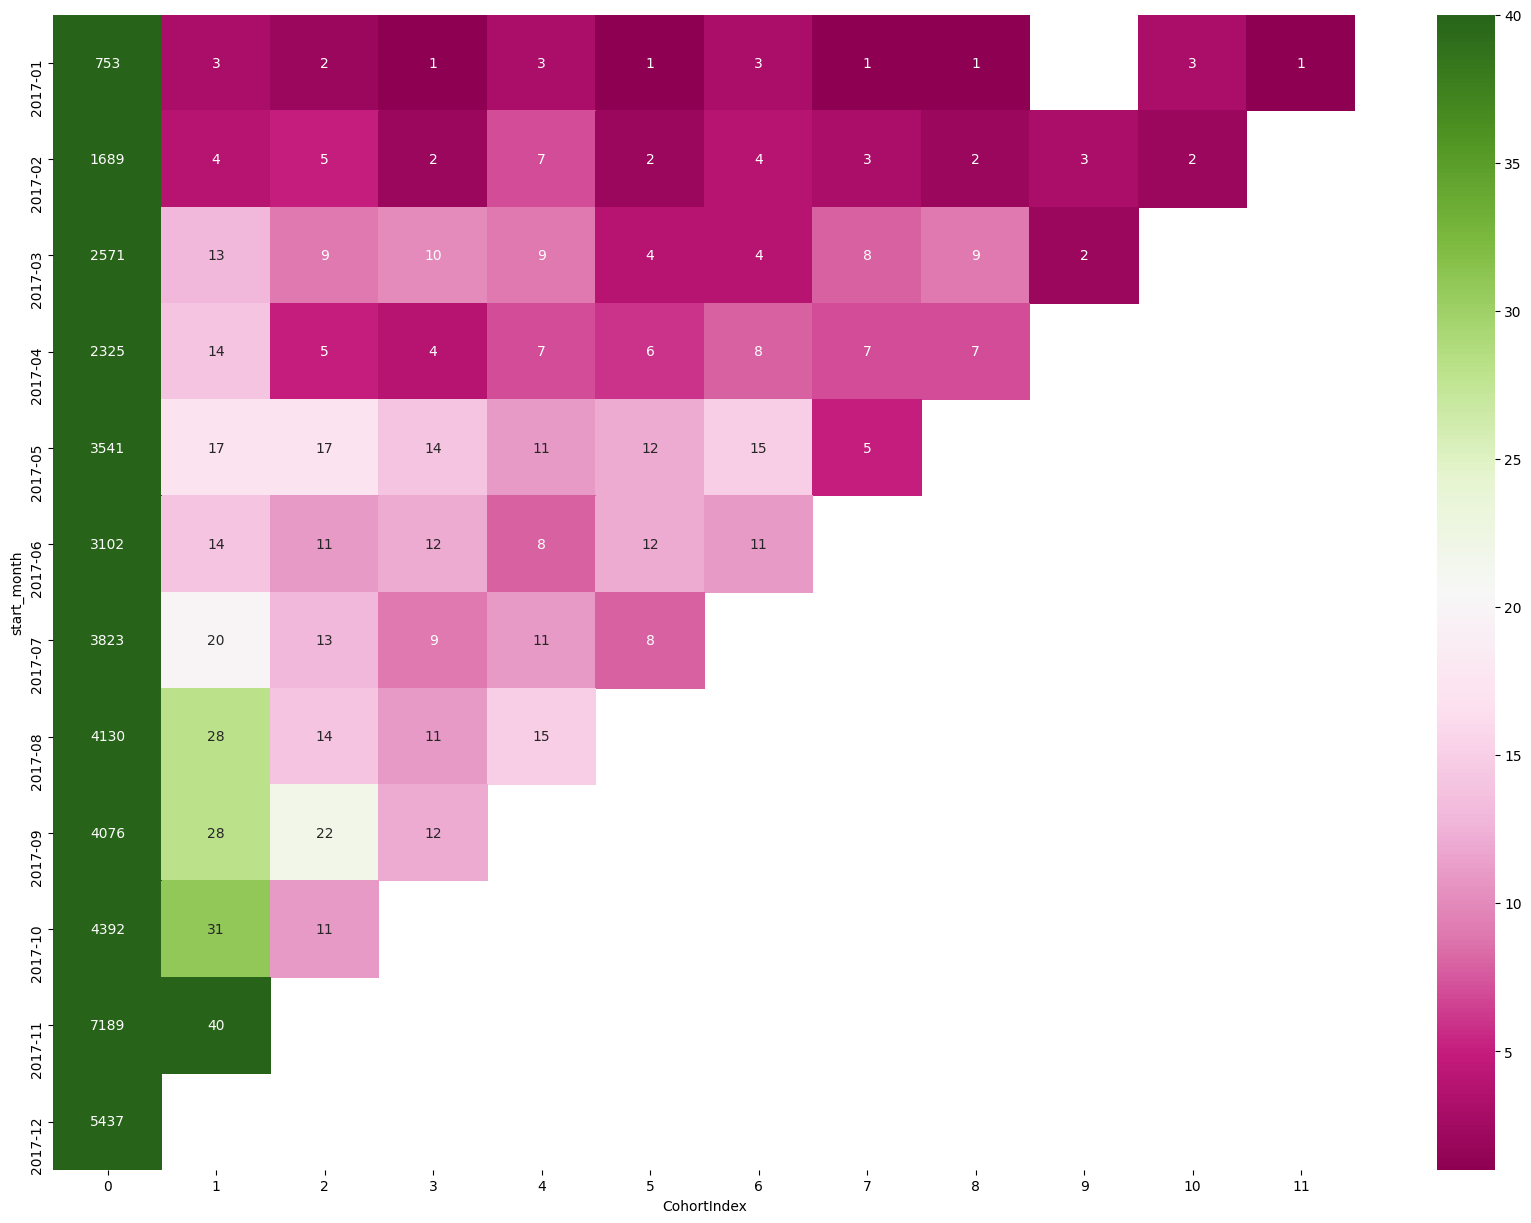

In [217]:
plt.figure(figsize=(21, 15))
sns.heatmap(cohort_pivot,
            cmap='PiYG',
            annot=True,
            fmt='.5g',
            vmax=40
            )

In [218]:
#по заданию нужно вычислить кагорту с самым высоким retention за 3й месяц
cohort_pivot['retention'] = cohort_pivot[3] / cohort_pivot[0] 
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,retention
start_month,,,,,,,,,,,,,
2017-01,753.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,0.001328
2017-02,1689.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN,0.001184
2017-03,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN,0.003890
2017-04,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN,0.001720
2017-05,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN,NaN,0.003954
2017-06,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN,0.003868
2017-07,3823.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002354
2017-08,4130.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002663
2017-09,4076.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002944


Самый высокий retention на 3й месяц у когорты 2017-05 =0.003954

# 6.Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

В данном задании буду использовать датафрейм из шага 3, включающий в себя отсорировонную по статусу покупки информацию о пользователях и заказах, а также о товарах

In [219]:
all_in_one.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,Saturday


In [220]:
# проверяю, есть ли пропущенные значения уникальных идентификаторов пользователей
all_in_one.customer_unique_id.isna().sum()

552

In [221]:
#удаляю их
all_in_one.dropna(subset=['customer_unique_id'], inplace=True) 

In [222]:
print('Orders from {} to {}'.format(all_in_one['order_purchase_timestamp'].min(),
                                    all_in_one['order_purchase_timestamp']  .max()))

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


In [223]:
#провожу группировку по заказам
df_6=all_in_one.groupby(['order_id','customer_unique_id','order_purchase_timestamp'],as_index=False)\
               .agg({'price':'sum'}) 
df_6.head()

,order_id,customer_unique_id,order_purchase_timestamp,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,199.90


In [224]:
#создаю переменную NOW для подсчета Recency score
NOW = df_6['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [225]:
#создаю колонку, в которой для каждого заказа отображается количество дней относительно "текущего" NOW
df_6['DaysSinceOrder'] = df_6['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
df_6.head()

,order_id,customer_unique_id,order_purchase_timestamp,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,239.90,495
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,199.00,232
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,12.99,26
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,199.90,576


In [226]:
# устанавливаю период наблюдения
period = df_6['order_purchase_timestamp'].max() - df_6['order_purchase_timestamp'].min()
period

Timedelta('728 days 11:51:38')

In [227]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(), 
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=728)])}
    # общее количество заказов за последний год (Frequency)

rfm = df_6.groupby('customer_unique_id').agg(aggr).reset_index() 
#создаю дф,сгруппированный по каждому покупателю с колонками Recency и Frequency(тут хранятся очки)
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1


In [228]:
monetary=df_6.groupby('customer_unique_id',as_index=False).agg({'price':'sum'})\
             .rename(columns={'price':'Monetary'})
#создаю дф с подсчитанными значениями monetary для каждого пользователя, следующим шагом объединяю его с дф rfm

In [229]:
rfm=rfm.merge(monetary,how='inner',on='customer_unique_id')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Далее необходимо по каждому сегменту присвоить покупателю очки. Это поможет разбить всех клиентов на классы и определить их покупательскую вовлеченность.

In [230]:
#посмотрю распределение значений по квартилям
rfm.describe()

,Recency,Frequency,Monetary
count,94981.000000,94981.000000,94981.000000
mean,243.426927,1.033849,142.072532
std,152.979619,0.210840,216.077000
min,1.000000,0.000000,0.850000
25%,119.000000,1.000000,47.900000
50%,224.000000,1.000000,89.890000
75%,352.000000,1.000000,155.000000
max,729.000000,16.000000,13440.000000


In [231]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()
quintiles

{'Recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 47.9, 0.5: 89.88999999999999, 0.75: 155.0}}

при подсчете очков recency более ценными являются клиенты с меньшим баллом, a при подсчете frequency & monetary-наоборот

In [232]:
# составляю функцию подсчета очков в зависимости от распределения значения по квартилям
def r(x):
    if x <= quintiles['Recency'][0.25]:
        return 4
    elif x <= quintiles['Recency'][0.5]:
        return 3
    elif x <= quintiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm(x, c):
    if x <= quintiles[c][0.25]:
        return 1
    elif x <= quintiles[c][0.5]:
        return 2
    elif x <= quintiles[c][0.75]:
        return 3
    else:
        return 4

In [233]:
#помещаю значения в датафрейм rfm
rfm['R'] = rfm['Recency'].apply(lambda x: r(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm(x,'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm(x,'Monetary'))
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4


Также необходимо для каждого пользователя определить его ранг RFM, назначив RFM_Score

In [234]:
rfm['RFM_Score'] = rfm.R.astype(str)+ rfm.F.astype(str) + rfm.M.astype(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214


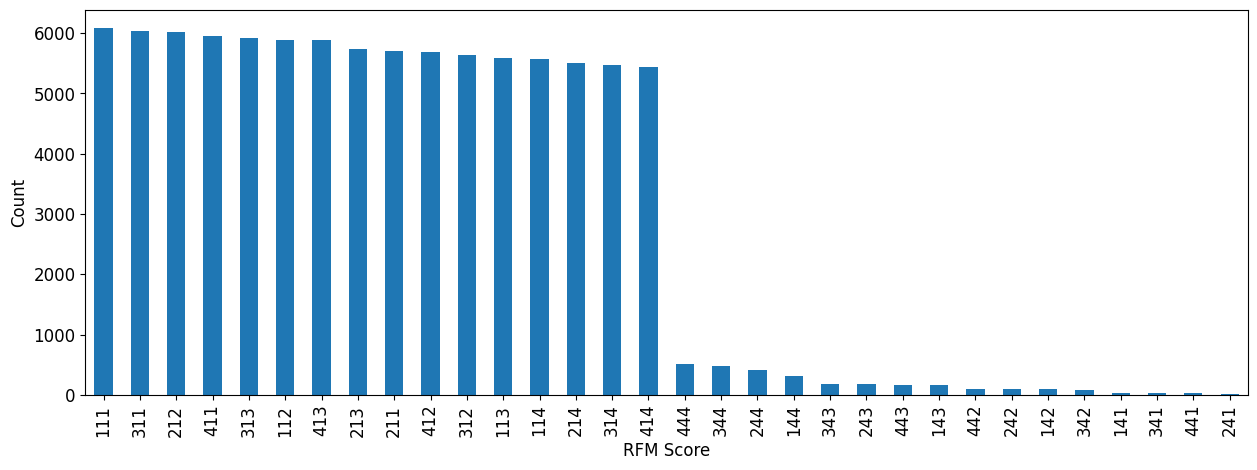

In [235]:
ax = rfm ['RFM_Score'] .value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

Получено 64 (4**3) возможных сочетания RFM score. Сложно провести сегментизацию клиентов по всем имеющимся очкам. Для удобства выделю 8 сегментов:
- Топ-покупатели (top): последняя покупка произошла недавно, покупают часто, тратят много (R:3,4; F:3,4; M:3,4)
- Лояльные клиенты (loyal customers): покупают часто (R:3,4, F:3,4; M:1,2,3)
- Потенциально лояльные клиенты (potential loyalists): клиенты начали покупать недавно, со средней частотой покупок (R:3,4; F:1,2,3; M:1,2,3,4)
- Многообещающие (promising): покупали недавно, но потратили немного (R:3; F:1,2; M:1,2,3)
- Новички (new customers): покупали недавно, но, в целом, нечасто (R:4; F:1,2; M:1,2,3,4)
- Требующие внимания (need attention): частота покупок ниже среднего, последняя покупка совершена давольно давно (R:2; F:1,2; M:1,2,3,4)
- Нельзя потерять (can't loose): покупали часто, тратили много, но давно не возвращались за покупками (R:1,2; F:3,4; M:1,2,3,4)
- Уснувшие (hibernating): последняя покупка совершена давно, покупали редко. Возмножно, единоразовая покупка (R:1; F:1,2; M:1,2,3,4)
    
из графика выше видно, что самые популярные сегменты   "уснувшие", "новички", "требующие внимания"

In [236]:
# определяю сегмент каждого пользователя.Данные записываю в новую колонку
segt_map = {
    r'11[1-4]': 'hibernating',
    r'[1-2][3-4][1-4]': 'can\'t loose',
    r'2[1-2][1-4]': 'need attention',
    r'[3-4][3-4][1-3]': 'loyal customers',
    r'3[1-2][1-3]': 'promising',
    r'4[1-2][1-4]': 'new customers',
    r'[3-4][1-3][1-4]': 'potential loyalists',
    r'[3-4][3-4][3-4]': 'top'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,new customers
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,need attention
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,need attention


In [237]:
# определяю количество клиентов в каждом сегменте
count=rfm.Segment.value_counts() 

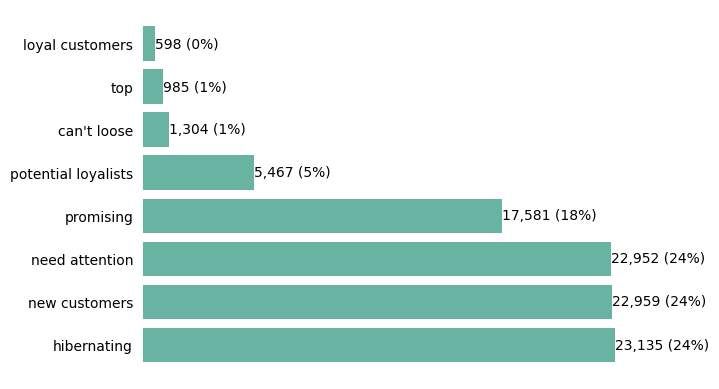

In [238]:
# визуализирую
fig, ax = plt.subplots()

bars = ax.barh(range(len(count)),
              count,
              color='#69b3a2')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(count)))
ax.set_yticklabels(count.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/count.sum())),
                va='center',
                ha='left'
               )

plt.show()